In [2]:
%matplotlib inline
import random
from mxnet import gluon, np, npx
from d2l import mxnet as d2l

npx.set_np()

# Exercises week 3
## 4.2.7.1

In [7]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens))
b1 = np.zeros(num_hiddens)
W2 = np.random.normal(scale=0.01, size=(num_hiddens, num_outputs))
b2 = np.zeros(num_outputs)

#params = [W1, b1, W2, b2]
params = [W1, b1, W2, b2]


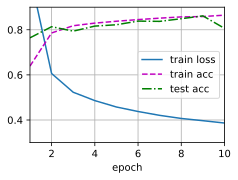

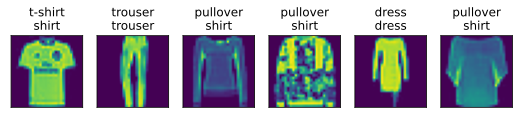

In [8]:
for param in params:
    param.attach_grad()

def relu(X):
    return np.maximum(X, 0)

def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(np.dot(X, W1) + b1)
    return np.dot(H, W2) + b2

loss = gluon.loss.SoftmaxCrossEntropyLoss()
num_epochs, lr = 10, 0.1
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size: d2l.sgd(params, lr, batch_size))

d2l.predict_ch3(net, test_iter)

I tried the values 64, 128, 256 and 512. It seems that if the number of hidden units is lower, the training loss will eventually reach a lower point, but it seems that the training accuracy and test accuracy remain more or less the same in the end. It does seem that less hidden layers means that these values are lower in the first epoch. Based on these tests, the optimal number would probably be in the middle, so the default 256.  

## 4.2.7.2

In [14]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens))
b1 = np.zeros(num_hiddens)
W2 = np.random.normal(scale=0.01, size=(num_hiddens, num_hiddens))
b2 = np.zeros(num_hiddens)
W3 = np.random.normal(scale=0.01, size=(num_hiddens, num_outputs))
b3 = np.zeros(num_outputs)

#params = [W1, b1, W2, b2]
params = [W1, b1, W2, b2, W3, b3]

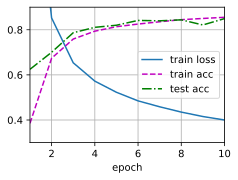

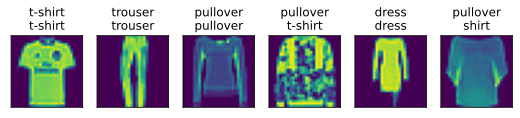

In [13]:
for param in params:
    param.attach_grad()

def relu(X):
    return np.maximum(X, 0)

def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(np.dot(X, W1) + b1)
    F = relu(np.dot(H, W2) + b2)
    return np.dot(F, W3) + b3

loss = gluon.loss.SoftmaxCrossEntropyLoss()
num_epochs, lr = 10, 0.1
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size: d2l.sgd(params, lr, batch_size))

d2l.predict_ch3(net, test_iter)

The additional hidden layer seems not to have too much influence on the final result.

## 4.2.7.3

In [15]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens))
b1 = np.zeros(num_hiddens)
W2 = np.random.normal(scale=0.01, size=(num_hiddens, num_hiddens))
b2 = np.zeros(num_hiddens)
W3 = np.random.normal(scale=0.01, size=(num_hiddens, num_outputs))
b3 = np.zeros(num_outputs)

#params = [W1, b1, W2, b2]
params = [W1, b1, W2, b2, W3, b3]

In [18]:
for param in params:
    param.attach_grad()

def relu(X):
    return np.maximum(X, 0)

def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(np.dot(X, W1) + b1)
    F = relu(np.dot(H, W2) + b2)
    return np.dot(F, W3) + b3

loss = gluon.loss.SoftmaxCrossEntropyLoss()
num_epochs, lr = 10, 0.9   
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size: d2l.sgd(params, lr, batch_size))

d2l.predict_ch3(net, test_iter)

AssertionError: 1.6898050249735515

For learning rate higher than 0.5 and lower than 0.1, we get an error.
Below is are the plots for learning rate 0.1 and 0.5. We can see very clearly that 0.5 has superior performance, both in accuracy and loss.

![Image](./images/learning_rate_ch3.jpg)

## 4.3.3.2

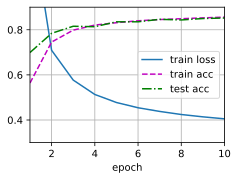

In [6]:
from mxnet import init
from mxnet.gluon import nn

net = nn.Sequential()
net.add(nn.Dense(64, activation='softsign'), nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

batch_size, lr, num_epochs = 256, 0.1, 10
loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

Below are the results for three different activation functions. It appears that all of them yield very similar results, so I guess it's dealers choice.

![Image](.\images\actfunc_ch3.jpg)

## 4.5.6.1



In [8]:
from mxnet import autograd
from mxnet import init
from mxnet.gluon import nn

In [9]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = np.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

L2 norm of w: 0.025867175


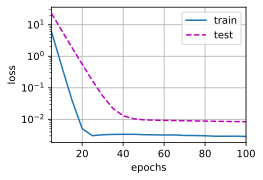

In [15]:
def init_params():
    w = np.random.normal(scale=1, size=(num_inputs, 1))
    b = np.zeros(1)
    w.attach_grad()
    b.attach_grad()
    return [w, b]

def l2_penalty(w):
    return (w**2).sum() / 2

def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                # The L2 norm penalty term has been added, and broadcasting
                # makes `l2_penalty(w)` a vector whose length is `batch_size`
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', np.linalg.norm(w))

train(lambd=10)

Increasing $\lambda$ will decrease both training and testing loss quicker. However, it also seems that both of these values eventually assume near constant values, approximately at $\lambda \geq 5$.

![IMG](./images/lambda_ch3.jpg)

## 4.6.7.4

Dropout is typically not used at test time, because doing this does not make much sense. If the model is already trained, dropout usually serves no purpose, since overfitting is only a problem during training.

## 4.7.6.2

It is better to first derive the new equations before drawing the computational graph.

#### Forward propagation
We only need to add the bias at certain points:
* $z = W^{(1)}X + b$
* $h = \phi(z)$
* $o = W^{(1)}h + b$

#### Backward propagation
Again, the bias needs to be inserted only at the layer activation computations.

In general we can compute the partial derivative of the cost function with respect to the bias: <br>
$\frac{\partial J}{\partial b} = \delta_i$, where delta is the error at a given layer $i$.

Then, we can derive the backward propagation equations: <br>
$\frac{\partial J}{\partial W^{(1)}} = \text{prod}(\frac{\partial J}{\partial z}, \frac{\partial z}{\partial W^{(1)}}) + \text{prod}(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial W^{(1)}}) + \text{prod}(\frac{\partial J}{\partial b}, \frac{\partial b}{\partial W^{(1)}})$.

And analogously for $W^{(2)}$.

#### Computational graph
<br>
Below is the computational for forward propagation:

![COMPGRAPH](./images/compgraph_dl_ch3.jpg)